What are the most demanded skilss for the top 3 most popular data roles?

Methodology:

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_US =df[df['job_country']=='United States'].copy()
df_US.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


In [23]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


Getting the skills count per job title

In [25]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


Get the Top 3 roles from the dataframe

In [16]:
job_titles =df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles 


['Data Analyst', 'Data Engineer', 'Data Scientist']

Plotting the top 3 skills

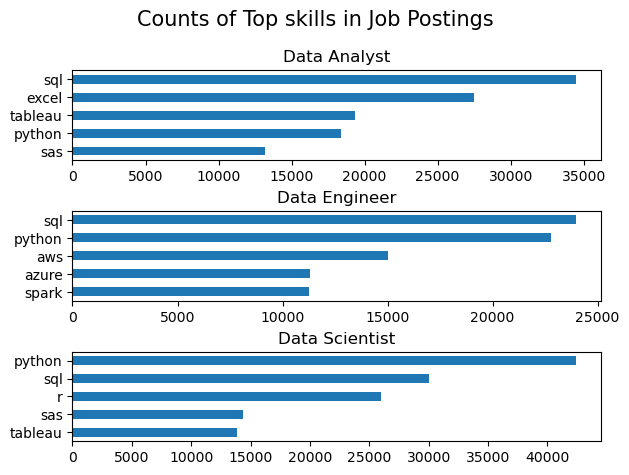

In [21]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind ='barh',x='job_skills',y='skills_count', ax=ax[i], title=job_title,legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    
fig.suptitle('Counts of Top skills in Job Postings',fontsize=15)
fig.tight_layout(h_pad =0.5) #fix the overlap
plt.show()

Calculating the percentage of skills per job postings


In [30]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [34]:

df_skill_perc =pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skill_perc['skill_percent']=100 * df_skill_perc['skills_count']/df_skill_perc['jobs_total']

df_skill_perc

,job_skills,job_title_short,skills_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


Plotting the percentages

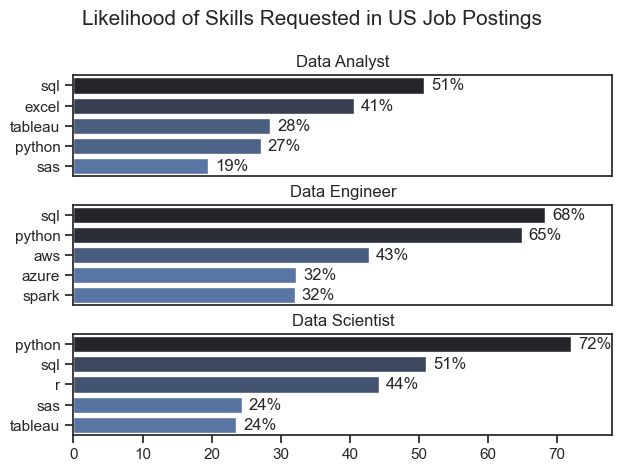

In [53]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind ='barh',x='job_skills',y='skill_percent', ax=ax[i], title=job_title,legend=False)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills',ax=ax[i],hue='skills_count',palette='dark:b_r',legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)


    for n,v in enumerate(df_plot['skill_percent']):
        #ax[i].text(v + 1, n, v, f'{int(v)}%', va='center')
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles)-1:
        ax[i].set_xticks([])
    
fig.suptitle('Likelihood of Skills Requested in US Job Postings',fontsize=15)
fig.tight_layout(h_pad =0.5) #fix the overlap
plt.show()